# Part II - Fashion Mnist
#####  @ Haim Goldfisher

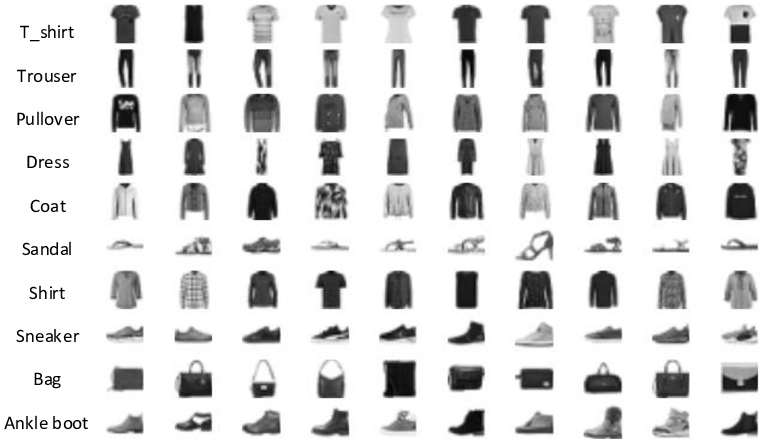

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# Data Preprocessing:

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score, accuracy_score

# Models:

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

# A model that I learned by myself: CatBoost + Plotly

from catboost import CatBoostClassifier
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

# offline (for plotly)

import plotly.offline as pyo

# Clustering:

from sklearn.cluster import KMeans

# PCA:

from sklearn.decomposition import PCA

# Scaling:

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cross Validation:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# training df:

df_train = pd.read_csv("C:\\Haim\\Anaconda\\fashion_mnist_train.csv") # csv pandas df

df_train.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
56059,2,0,0,0,0,0,2,0,0,0,...,5,4,0,45,147,144,4,0,0,0
32997,4,0,0,0,0,0,0,1,2,0,...,3,0,0,191,198,0,0,0,0,0
50681,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13395,8,0,0,0,0,0,0,0,0,0,...,211,214,208,199,197,208,212,193,42,0


In [3]:
# testing df: we will not train our model on this df, we will test out model on it at the end of the notebook

df_test = pd.read_csv("C:\\Haim\\Anaconda\\fashion-mnist_test.csv") # csv pandas df

df_test.sample(n = 4, random_state = 8).sort_values(by = 'label')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1197,1,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
6759,2,0,0,0,0,0,0,1,0,0,...,0,0,0,89,100,13,0,0,0,0
697,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
837,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, we have the label - the type of cloth, and 0-255 value for each pixel in the frame.

In [4]:
df_train.shape # 60000 rows and 785 columns (784 pixels + label column)

(60000, 785)

In [5]:
df_test.shape # 10000 rows and 785 columns (784 pixels + label column) - test

(10000, 785)

In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


As you can see, each label can be taken on its own. It is also possible to notice that in general, there are some differences between the labels.

In [7]:
df_train[df_train['label']==3].describe() # 3 = Dress

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.0,6000.000000,6000.000000,6000.0000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3.0,0.002667,0.002667,0.0035,0.005833,0.129500,0.359500,0.920000,2.021167,5.126167,...,67.422000,36.052667,13.772333,4.007333,1.265667,0.417667,0.095500,0.031167,0.007833,0.011333
std,0.0,0.206559,0.206559,0.2164,0.230524,1.981342,5.620189,8.942423,14.114541,21.429500,...,64.078267,53.129916,34.930644,17.694937,9.936358,4.417179,2.276893,1.040853,0.470612,0.700681
min,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,115.000000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.0,16.000000,16.000000,16.0000,16.000000,71.000000,202.000000,198.000000,216.000000,232.000000,...,255.000000,255.000000,255.000000,241.000000,189.000000,112.000000,100.000000,59.000000,35.000000,53.000000


In [8]:
df_train[df_train['label']==9].describe() # 9 = Ankle boot 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,9.0,0.0,0.010000,0.010000,0.010000,0.010000,0.010167,0.010667,0.010667,0.012333,...,0.464500,1.017833,2.398833,4.616167,7.557000,8.332500,7.149667,5.402833,2.698333,0.205167
std,0.0,0.0,0.376285,0.376285,0.376285,0.376285,0.377386,0.378475,0.379355,0.384975,...,6.179922,10.100537,16.947555,24.181790,31.480501,33.038667,29.745163,25.483814,16.859272,3.132737
min,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.0,0.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,179.000000,221.000000,230.000000,252.000000,243.000000,255.000000,238.000000,225.000000,205.000000,92.000000


In [9]:
df_train.isnull().sum().sum() # the dataset has no NaN values

0

In [10]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [11]:
cor = df_train.corr()

In [12]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

label       1.000000
pixel11     0.507680
pixel12     0.569076
pixel17     0.500036
pixel18     0.537011
              ...   
pixel559    0.578456
pixel585    0.527442
pixel586    0.561620
pixel587    0.535309
pixel614    0.508677
Name: label, Length: 106, dtype: float64

In [13]:
target = df_train['label'] # the feature we would like to predict, the label of picture
data = df_train.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

In [14]:
# we will split our testing dataset into data & target. We can't train this dataset. we will use it as a X_test & y_test

test_labels = df_test['label'] # the feature we would like to predict, the label of picture
test = df_test.drop(['label'], axis = 1) # we will drop y from x, because we want to predict it

There are 10 labels, it means that there are 10 different types of clothing to be classified:

* 0 - T-Shirt/Top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle Boot

In [15]:
# A function to show the labels
def num_to_name(label):
    labeled = label.copy()
    mapping = {0 :'T-Shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle Boot'}
    labeled = label.map(mapping)
    return labeled

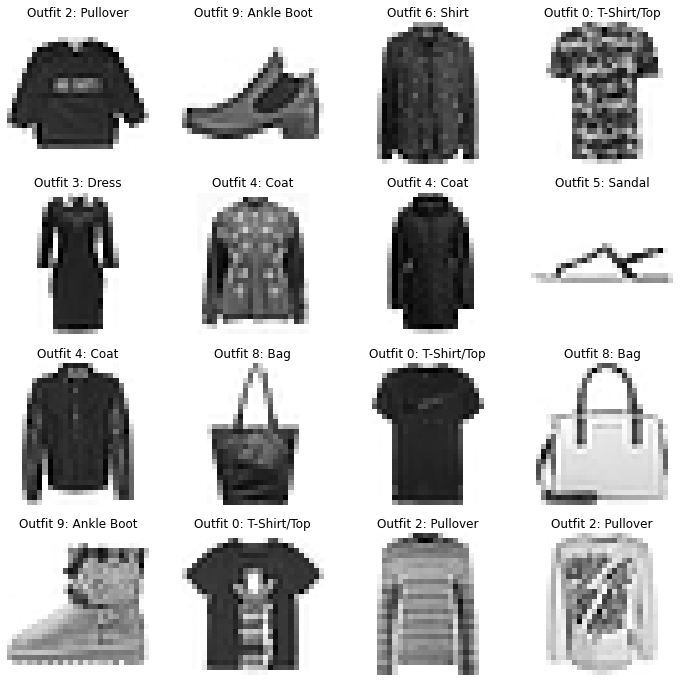

In [16]:
fig, axes = plt.subplots(4, 4, figsize = (12,12))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(data.values.reshape((data.shape[0], 28, 28))[i], cmap=plt.get_cmap('binary'))
    axes[i].set_title("Outfit " + str(target[i]) + ": "+ num_to_name(target)[i])
    axes[i].axis('off')
plt.show()

In [17]:
target.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

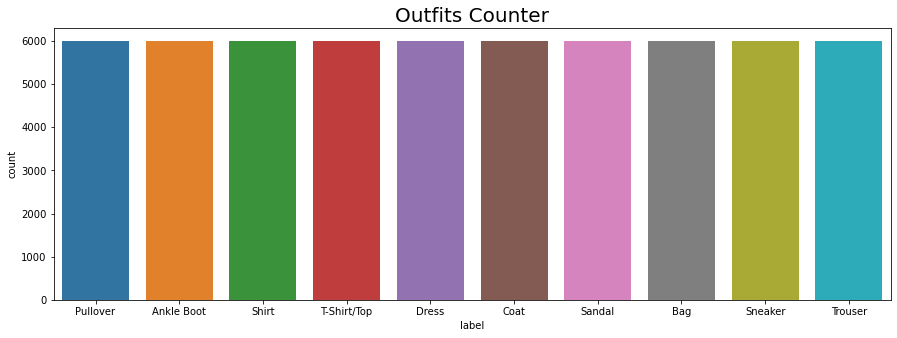

In [18]:
plt.subplots(figsize = (15,5))
plt.title("Outfits Counter", size=20)
fig = sns.countplot(num_to_name(target))

## Data Processing

The things that are important to consider before start to work with the data:
- As we can see, when a pixel value is 0 (black pixel), it means that its an empty pixel. We would like to drop pixels which are empty in most of the pictures.
- We will consider choosing to use one of the following methods in order to make our model more compact: PCA and K-means. Note that in the PCA method we would like to use as few pixels as possible in order to label the item of clothing. When using the K-Means method, we want to use as few colors as possible in the classification process.
- We would like to understand which labels are more difficult to classify, and which are easier. We may consider using a more complex model in cases where the differences between two labels are the most minor and requires a maximum of data. On the other hand, when an item is easy to identify, less data is required to classify it.

### Training / Testing Split:

In [19]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=18)
X_test = test.copy()

### Scaling: 

In [20]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

##### Since we have 256 pixels (0-255), we can divide them into 255 in order to achieve the desired range values (0-1).

In [21]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

##### We would like to find our optimal n_components value 

In [22]:
pca = PCA() # all 784 features
pca.fit(X_train)

PCA()

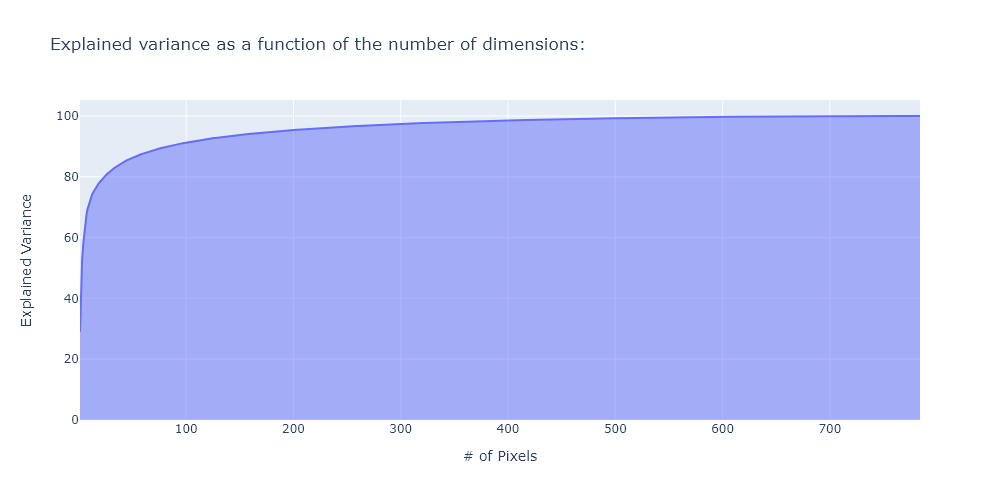

In [23]:
# A graph to present the conection between the num of features & the explained variance: 
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    title = "Explained variance as a function of the number of dimensions:",
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul * 100,
    labels={"x": "# of Pixels", "y": "Explained Variance"},
    width = 1000 ,
    height = 500
)

fig.show("png")

##### We can see that by taking only 187 features, we stay with 95% of explained variance. 

In [24]:
pca = PCA(n_components=0.95) # we can try using svd_solver="randomized"
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
pca.n_components_

187

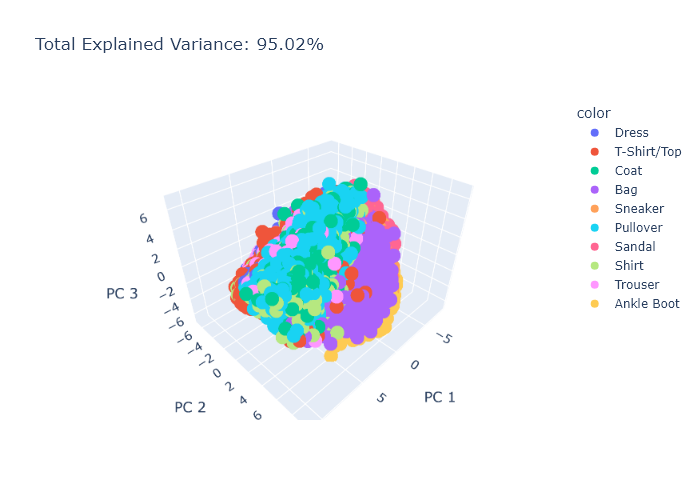

In [25]:
# A three-dimensional graph depicting the way our data is interpreted, plotly does it easily for us 
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_train_reduced, x=0, y=1, z=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show("png")

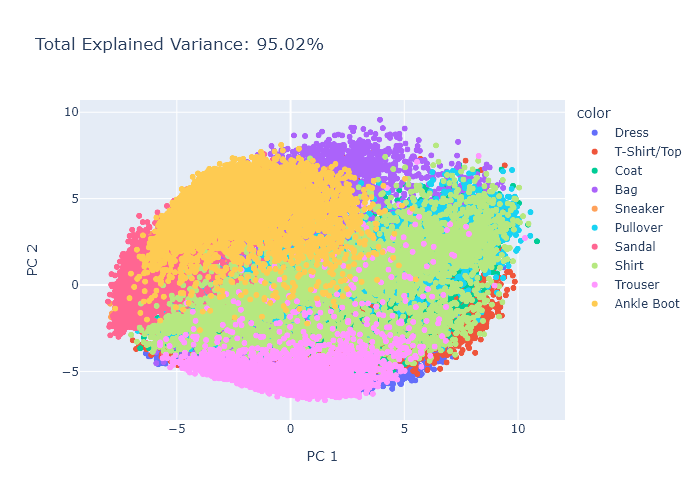

In [26]:
# 2D version: with x and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=0, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

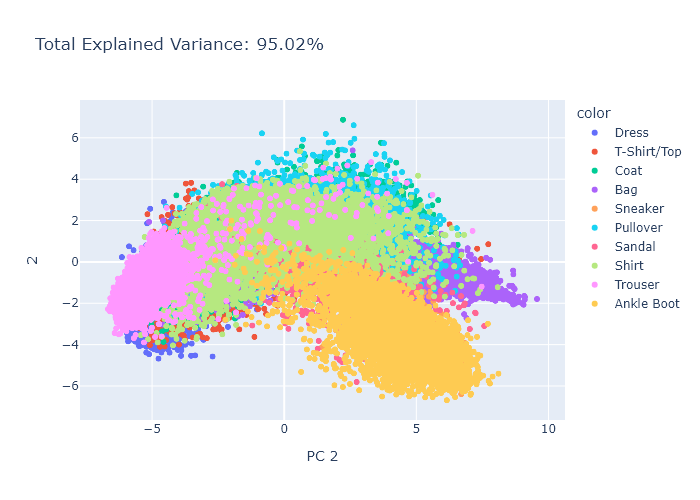

In [27]:
# 2D version: with y and z
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=1, y=2, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

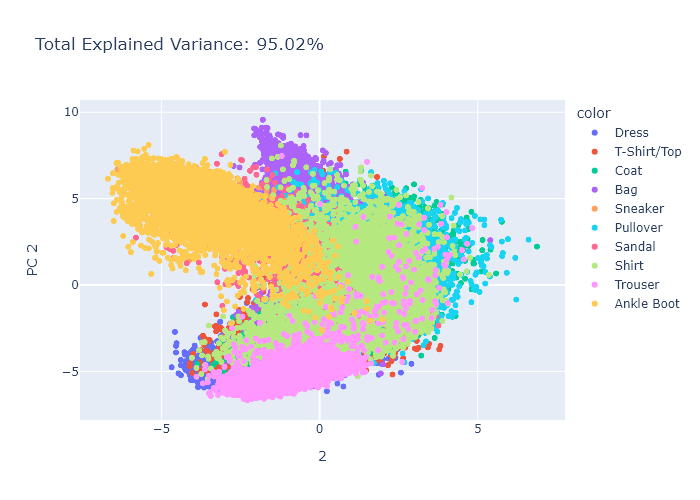

In [28]:
# 2D version: with z and y
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(
    X_train_reduced, x=2, y=1, color = num_to_name(y_train),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
fig.show("png")

##### We can present some of our new pics after the transfromation to 187 dimentionds:

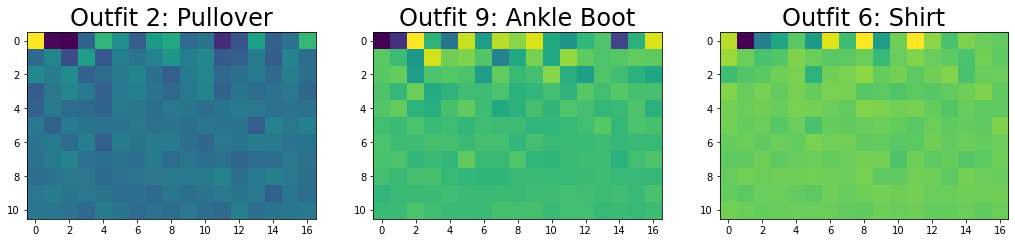

In [29]:
plt.figure(figsize=(30,20))

for i in range(3):
    plt.subplot(4,5,i+1)
    plt.title("Outfit " + str(y_train[i]) + ": "+ num_to_name(y_train)[i], size = 24)
    plt.imshow(X_train_reduced[i].reshape(11,17))

plt.show;

##### After reducing the num of the features, we will convert X_train & X_validation to pandas data frames:

In [30]:
X_train = pd.DataFrame(X_train_reduced)
X_val = pd.DataFrame(X_val_reduced)

# Models

##### We will use some of the models we have learned trought this year to predict the type of the outfit. We would like to use the three best model to create a voting model.

## Naive Bayes

##### This model is extremly simple. We will use it as our dummy model. Dummy Classifier should do 10% of success in a multi class classification of 10 equal classes.

In [31]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes

GaussianNB()

In [32]:
y_pred = bayes.predict(X_val)
bayes_acc = accuracy_score(y_val, y_pred)
bayes_acc

0.74725

In [33]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1207
           1       0.94      0.90      0.92      1208
           2       0.73      0.66      0.70      1195
           3       0.80      0.74      0.77      1203
           4       0.74      0.69      0.71      1191
           5       0.78      0.71      0.74      1159
           6       0.53      0.47      0.50      1204
           7       0.75      0.85      0.79      1246
           8       0.59      0.85      0.70      1177
           9       0.94      0.85      0.89      1210

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.75     12000
weighted avg       0.75      0.75      0.75     12000



##### Due to Guessian Naive Bayes results, our model must be better than 74.7% of success on our validation test.  

## KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(X_val)
knn_acc = accuracy_score(y_val, y_pred)
knn_acc

0.8583333333333333

In [36]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1207
           1       0.98      0.98      0.98      1208
           2       0.73      0.79      0.76      1195
           3       0.91      0.86      0.88      1203
           4       0.78      0.76      0.77      1191
           5       0.99      0.87      0.93      1159
           6       0.67      0.58      0.62      1204
           7       0.90      0.96      0.93      1246
           8       0.98      0.95      0.96      1177
           9       0.92      0.96      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



## Logistic Regression

In [37]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
lr

C:\Haim\Anaconda\Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [38]:
y_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, y_pred)
lr_acc

0.8558333333333333

In [39]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1207
           1       0.97      0.97      0.97      1208
           2       0.75      0.75      0.75      1195
           3       0.87      0.87      0.87      1203
           4       0.76      0.79      0.78      1191
           5       0.95      0.92      0.93      1159
           6       0.66      0.58      0.62      1204
           7       0.91      0.94      0.93      1246
           8       0.94      0.94      0.94      1177
           9       0.95      0.95      0.95      1210

    accuracy                           0.86     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.86      0.85     12000



## CatBoost

##### An open-source software library developed by Yandex. It provides a Gradient Boosting framework which attempts to solve for Categorical features using a permutation driven alternative compared to the classical algorithm. For more information: https://catboost.ai/

In [40]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
cat

In [41]:
y_pred = cat.predict(X_val)
cat_acc = accuracy_score(y_val, y_pred)
cat_acc

0.885

In [42]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1207
           1       0.99      0.98      0.98      1208
           2       0.81      0.81      0.81      1195
           3       0.90      0.90      0.90      1203
           4       0.81      0.84      0.83      1191
           5       0.95      0.94      0.95      1159
           6       0.72      0.65      0.68      1204
           7       0.93      0.95      0.94      1246
           8       0.95      0.95      0.95      1177
           9       0.97      0.97      0.97      1210

    accuracy                           0.89     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.89      0.88     12000



## AdaBoost

In [43]:
rfc = RandomForestClassifier(n_estimators=10)
ada = AdaBoostClassifier(n_estimators=100,learning_rate= 0.1, base_estimator=rfc)
ada.fit(X_train, y_train)
ada

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
                   learning_rate=0.1, n_estimators=100)

In [44]:
y_pred = ada.predict(X_val)
ada_acc = accuracy_score(y_val, y_pred)
ada_acc

0.8605

In [45]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1207
           1       0.99      0.96      0.98      1208
           2       0.78      0.78      0.78      1195
           3       0.87      0.90      0.89      1203
           4       0.78      0.80      0.79      1191
           5       0.96      0.91      0.93      1159
           6       0.70      0.51      0.59      1204
           7       0.89      0.94      0.92      1246
           8       0.89      0.95      0.92      1177
           9       0.94      0.95      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



## XGBoost

In [46]:
xgb = XGBClassifier(use_label_encoder =False)
xgb.fit(X_train, y_train)
xgb

[23:57:32] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [47]:
y_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, y_pred)
xgb_acc

0.8841666666666667

In [48]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1207
           1       0.99      0.97      0.98      1208
           2       0.80      0.79      0.80      1195
           3       0.90      0.91      0.90      1203
           4       0.81      0.84      0.83      1191
           5       0.96      0.94      0.95      1159
           6       0.71      0.65      0.68      1204
           7       0.94      0.94      0.94      1246
           8       0.95      0.95      0.95      1177
           9       0.96      0.97      0.96      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



## Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, y_pred)
rf_acc

0.864

In [51]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1207
           1       0.99      0.97      0.98      1208
           2       0.76      0.83      0.79      1195
           3       0.88      0.89      0.89      1203
           4       0.79      0.81      0.80      1191
           5       0.92      0.91      0.91      1159
           6       0.72      0.54      0.62      1204
           7       0.92      0.93      0.92      1246
           8       0.93      0.94      0.93      1177
           9       0.93      0.95      0.94      1210

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



##### Now we would like to take our top 3 models and mix  them into a voting model:

## Voting

Soft Voting/Majority Rule classifier for unfitted estimators.

### Hard Voting:

In [52]:
clf1 = xgb
clf2 = knn
clf3 = rf
clf4 = cat

In [53]:
hv = VotingClassifier(estimators=[
        ('xgb', clf1), ('knn', clf2), ('rf', clf3)], voting='hard')
hv.fit(X_train, y_train)
hv

[00:10:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                             

In [54]:
y_pred = hv.predict(X_val)
hv_acc = accuracy_score(y_val, y_pred)
hv_acc

0.881

In [55]:
print (classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1207
           1       0.99      0.97      0.98      1208
           2       0.77      0.83      0.80      1195
           3       0.91      0.90      0.90      1203
           4       0.81      0.83      0.82      1191
           5       0.97      0.93      0.95      1159
           6       0.76      0.58      0.66      1204
           7       0.93      0.95      0.94      1246
           8       0.96      0.95      0.96      1177
           9       0.95      0.97      0.96      1210

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



### Soft Voting:

In [ ]:
sv = VotingClassifier(estimators=[
        ('xgb', clf1), ('cat', clf4), ('rf', clf3)], voting='soft')
sv.fit(X_train, y_train)
sv

[00:22:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
y_pred = sv.predict(X_val)
y_pred_sv = y_pred.copy()
sv_acc = accuracy_score(y_val, y_pred)
sv_acc

In [ ]:
print (classification_report(y_val, y_pred))

### Conclusion:

In [ ]:
acc_list = {'Model':  ['Naive Bayes', 'KNN','Logistic Regression','CatBoost', 'AdaBoost', 'XGBoost','Random Forest','Hard Voting', 'Soft Voting'],
        'Accuracy': [bayes_acc,knn_acc,lr_acc,cat_acc,ada_acc,xgb_acc,rf_acc,hv_acc,sv_acc],
        }

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=acc_list['Model'], y=acc_list['Accuracy'],text=np.round(acc_list['Accuracy'],2),textposition='outside'),
])
fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show("png")

Before testing our model on the test df, we would like to improve it by doing cross validation on the train dataset

In [ ]:
# we will concat our X,y train & validation for cross validation on our best model - catboost

X = pd.concat([X_train, X_val], axis = 0)
y = pd.concat([y_train, y_val], axis = 0)

# now the dataset is united again, we can split it 5 time for cv score

cv_score = cross_val_score(sv, X=X, y=y, cv=5)
cv_score

# The Best Model is Soft Voting: XGB, CatBoost and Random Forest, with  89% of success, by using 187 pixels.

In [ ]:
cm = confusion_matrix(y_val, y_pred_sv)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.coolwarm)
plt.title('Confusion matrix for Soft Voting', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

# Testing our best model on test df:

After making our model from the train dataset, we would like to figure out if our model will succeed with new data that it never seen before. 

In [ ]:
X_test = pca.transform(X_test)
y_test = test_labels.copy()

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.coolwarm)
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## To sum up, our "Soft Voting" model (GXB, Random Forest and CatBoost) did 88.67% of success on the testing dataset. By using PCA, we used 187 out of 784 pixels to achieve this result.